<a href="https://colab.research.google.com/github/pmb-7684/Data_Mining_Project_3/blob/main/DM_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Overview of Project

The main goal of Project 3 is to get some hands-on experience working with a regression problem. Pre-processing will be needed, such as transforming the existing features and/or feature engineering to create new ones. Try to experiment with different features, pre-processing methods, and possibly regression techniques to improve the model's performance. It is required to build at least a linear regression model (which we have covered in class). It is optional to experiment with other types of regression techniques as well to improve performance.

When writing your blog post, you will want to first include (1) an introduction to this competition and dataset. Next, (2) discuss what regression is and how it works (specifically linear regression). Math for bonus points. Then, (3) discuss your experiments. Specifically, write about your thought processes as you are going through each of your experiments. What pre-processing steps did you take and why? What features did you include or exclude and why? What types of regression model(s) did you try and why? Have at least three different experiments (this is a part of the rubric). Lastly, (4) conclude with what you have learned from this project.

### **Introduction**

Fossil fuel can be a double-edged sword offering both positive and negative opportunities.  It can offer wealth to countries to fuel their economies and gasoline (plus byproducts) to offer mobility and comfort in the form of electricity for their citizens.  On the other hand, fossil fuel can be devastating to the environment if it is extracted incorrectly, and it is not an infinite resource.

A promising renewable energy resource is the use of wave farms to create energy.  The ocean covers 70% of the earth's surface.  It is also about 97% of all water on Earth.  The abundancy of water is a major reason to explore wave farming as an option.

#### Perth Wave Power Project
Perth Wave Power Project is an offshore development in Western Australia that went live in February 2015. At that time, the energy generated was able to power 3,500 households.  It is expected to reduce greenhouse gas emission by more than 500,000t over the life of the project.

The Perth and Sydney wave converters use large buoys tied to the sea floor by a rope.  As the buoy rises and falls with each passing wave, the rope tightens causes high pressures.  These pressures are piped to shore where it powers water desalination plants and produces electricity.

The goal is to predict the total power output based on the coordination of the wave energy converters.  By demonstrating the benefits of wave energy maybe we can change a few minds to invest in wave energy.



Image loaded successfully. Dimensions: 1190x584, Mode: P


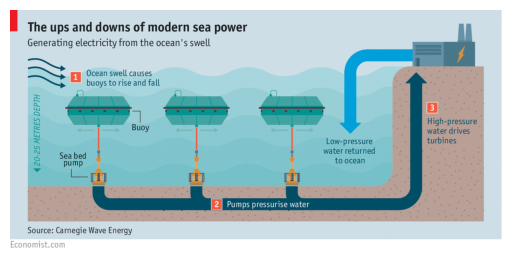

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

image_path = '/content/sample_data/Wave_Energy.png'
image = Image.open(image_path)

# Display image properties (width, height, mode)
width, height = image.size
mode = image.mode
print(f"Image loaded successfully. Dimensions: {width}x{height}, Mode: {mode}")
image.show()


plt.imshow(image)
plt.axis('off')
plt.show()

### **DataSet**

The entire dataset includes 4 CSV files for wave energy converters based in Perth and Sydney, Australia.  Each city contains two files, one containing 49 wave energy converters and another containing 100 wave energy converters.

Features
*   $X_1,...,X_n$ are the X coordinates for the location of the $X_i$ buoy.
*   $Y_1,...,Y_n$ are the corresponding Y coordinates for the location of the $X_i$ buoy.
*   $Power_1,...,Power_n$ is the Power generated by the buoy $X_i Y_i$.
*   qW is the quettawatt($10^3$$^0$) generated by the buoy $X_i Y_i$.
*   Total Power is the total power generated by the buoy $X_i Y_i$.

[Large-scale Wave Energy Farm](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm)




### **What is regression and how does it work?**
Explain what regression is and how it works (specifically linear regression, as we have covered it in class OR if you used a different regression model, you may explain that one instead if prefererd). Bonus points for math (up to 5 bonus points for very good explanations).

In [7]:
wave_df = pd.read_csv("/content/sample_data/WEC_Perth_49.csv")
wave_df.head(3)

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.5,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.5,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.5,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44


### **Data understanding**

Before diving right into the work, what steps do you take to first gain an understanding of your data? For example, are any features correlated with each other? Are there any existing patterns? What visualizations can you make to help gain this initial understanding?

### **Experiment 1: Pre-processing**

After the initial understanding, what steps need to be taken? Do you need to deal with null values? What features are you going to try using for your first experiment and why? Do you need to transform any features (e.g., change from categorical to numerical)? Are you trying to create any new features to use?

In [8]:
wave_df.shape

(36043, 149)

In [9]:
wave_df.isna().sum()

,0
X1,0
Y1,0
X2,0
Y2,0
X3,0
...,...
Power47,0
Power48,0
Power49,0
qW,0


In [10]:
wave_df.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
count,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,...,36043.000000,36043.00000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,3.604300e+04
mean,366.597060,18.709550,426.314033,51.085762,477.295590,57.846020,497.150488,73.323178,684.309548,44.012247,...,93678.772248,96530.68484,96666.293181,97007.214249,98466.265281,98106.278501,97462.663041,96134.920454,0.833849,3.938246e+06
std,307.911246,44.043295,265.781316,90.151852,270.322011,42.143917,279.631344,51.140816,237.862684,59.242702,...,7401.226140,6709.53446,7020.690028,4829.877255,4978.194259,4263.508074,3134.420742,3889.098339,0.026052,1.226171e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52516.130000,56391.97000,53877.360000,53050.330000,55401.380000,63028.260000,61717.310000,47257.430000,0.720000,3.388944e+06
25%,65.770000,0.000000,200.000000,0.000000,289.950000,50.000000,300.000000,50.000000,600.000000,0.000000,...,88177.210000,94648.08000,96932.520000,97612.350000,97629.940000,97154.630000,96869.740000,96319.550000,0.810000,3.847335e+06
50%,250.000000,0.000000,346.090000,37.520000,400.000000,74.820000,500.000000,100.000000,700.000000,0.080000,...,93694.540000,98729.91000,99269.310000,98857.150000,100423.930000,99805.920000,98710.730000,96543.090000,0.830000,3.931541e+06
75%,600.000000,0.000000,745.980000,37.900000,689.800000,74.960000,632.750000,112.150000,850.000000,50.000000,...,100997.520000,100622.52000,100282.360000,99156.130000,101370.970000,100955.350000,99064.495000,97036.300000,0.860000,4.063623e+06
max,1000.000000,885.590000,1000.000000,939.260000,1000.000000,990.000000,1000.000000,990.000000,1000.000000,919.590000,...,110945.940000,109400.43000,114194.520000,106702.150000,104751.350000,102892.110000,102275.480000,101876.140000,0.880000,4.177659e+06



### Experiment 1:Modeling  --To BE COMPLETED
Create a linear regression model for your first experiment.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.htmlLinks to an external site.


Links to an external site.


Links to an external site.


Links to an external site. to an external site.

In [21]:
# linear regression

X = [[X1,	Y1],	['X2',	'Y2'],	['X3',	'Y3'],	['X4',	'Y4'],	['X5',	'Y5'],	['X6',	'Y6'],	['X7',	'Y7'],	['X8',	'Y8'],	['X9',	'Y9'],	['X10',	'Y10'], ['X11','Y11']	,['X12'	,'Y12'],['X13','Y13']	,['X14','Y14']	,['X15',	'Y15'],['X16'	,'Y16']	,['X17',	'Y17']	,['X18'	,'Y18'],['X19'	,'Y19']	,['X20',	'Y20'],
      [X21,Y21],	['X22',	'Y22'],['X23','Y23']	,['X24','Y24'],['X25',	'Y25']	,['X26'	,'Y26']	,['X27'	,'Y27']	,['X28'	,'Y28'],	['X29',	'Y29']	,['X30',	'Y30'], ['X31',	'Y31'],	['X32'	,'Y32'],['X33','Y33']	,['X34','Y34']	,['X35'	,'Y35']	,['X36',	'Y36'],	['X37',	'Y37']	,['X38',	'Y38'],	['X39'	,'Y39'],['X40',	'Y40'],
      [X41,	Y41],	['X42',	'Y42'],	['X43'	,'Y43'],	['X44','Y44']	,['X45'	,'Y45'],['X46',	'Y46']	,	['X47',	'Y47'],	['X48',	'Y48'],['X49'	,'Y49']	,'Power1' ,'Power2',	'Power3',	'Power4',	'Power5',	'Power6',	'Power7',	'Power8',	'Power9', 'Power10',
      'Power11' ,'Power12',	'Power13',	'Power14',	'Power15',	'Power16',	'Power17',	'Power18',	'Power19', 'Power20', 'Power21' ,'Power22',	'Power23',	'Power24',	'Power25',	'Power26',	'Power27',	'Power28',	'Power29', 'Power30',
      'Power31' ,'Power32',	'Power33',	'Power34',	'Power35',	'Power36',	'Power37',	'Power38',	'Power39', 'Power40','Power41','Power42',	'Power43',	'Power44',	'Power45',	'Power46',	'Power47',	'Power48',	'Power49',	'qW']
y = [['Total_Power']]


NameError: name 'X1' is not defined

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

ValueError: Found input variables with inconsistent numbers of samples: [99, 1]

In [20]:
X

[['X1', 'Y1'],
 ['X2', 'Y2'],
 ['X3', 'Y3'],
 ['X4', 'Y4'],
 ['X5', 'Y5'],
 ['X6', 'Y6'],
 ['X7', 'Y7'],
 ['X8', 'Y8'],
 ['X9', 'Y9'],
 ['X10', 'Y10'],
 ['X11', 'Y11'],
 ['X12', 'Y12'],
 ['X13', 'Y13'],
 ['X14', 'Y14'],
 ['X15', 'Y15'],
 ['X16', 'Y16'],
 ['X17', 'Y17'],
 ['X18', 'Y18'],
 ['X19', 'Y19'],
 ['X20', 'Y20'],
 ['X21', 'Y21'],
 ['X22', 'Y22'],
 ['X23', 'Y23'],
 ['X24', 'Y24'],
 ['X25', 'Y25'],
 ['X26', 'Y26'],
 ['X27', 'Y27'],
 ['X28', 'Y28'],
 ['X29', 'Y29'],
 ['X30', 'Y30'],
 ['X31', 'Y31'],
 ['X32', 'Y32'],
 ['X33', 'Y33'],
 ['X34', 'Y34'],
 ['X35', 'Y35'],
 ['X36', 'Y36'],
 ['X37', 'Y37'],
 ['X38', 'Y38'],
 ['X39', 'Y39'],
 ['X40', 'Y40'],
 ['X41', 'Y41'],
 ['X42', 'Y42'],
 ['X43', 'Y43'],
 ['X44', 'Y44'],
 ['X45', 'Y45'],
 ['X46', 'Y46'],
 ['X47', 'Y47'],
 ['X48', 'Y48'],
 ['X49', 'Y49'],
 'Power1',
 'Power2',
 'Power3',
 'Power4',
 'Power5',
 'Power6',
 'Power7',
 'Power8',
 'Power9',
 'Power10',
 'Power11',
 'Power12',
 'Power13',
 'Power14',
 'Power15',
 'Power16',
 '

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

### Experiment 1: Evaluation  --To BE COMPLETED

Evaluate your first model. For example, use root mean squared error (RMSE).

Note: if you would like to try submitting your work to the competition, their submissions are evaluated using RMSE. Submitting to the competition is not required, but it might be fun to experience! More information on how to submit is under the "Overview" tab, then "Evaluation."

### Experiment 2  --To BE COMPLETED

For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

### Experiment 3  --To BE COMPLETED

(Same as above.)
For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

### Impact Section --To BE COMPLETED

Discuss the possible impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have a negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.

### Conclusion  --To BE COMPLETED

Discuss what you have learned from this project and through the different experiments. For example, did certain pre-processing steps help improve the model? Did you try using feature selection, and including/excluding certain features improve performance?

### References

*   [Optimisation of large wave farms using a multi-strategy evolutionary framework](https://www.semanticscholar.org/paper/153a3eeff91e73eb45338719579a900972f7a9ca)
*   https://education.nationalgeographic.org/resource/all-about-the-ocean/


*   https://www.power-technology.com/projects/perth-wave-energy-project/
*   https://createdigital.org.au/wave-energy-landscape/

*   https://www.abc.net.au/news/2022-07-31/wave-power-generator-supplying-king-island-with-electricity/101282070
* https://www.abc.net.au/listen/programs/scienceshow/perth-wave-energy-project-producing-power-and-fresh-water/6507450
* https://www.mathconverse.com/en/Definitions/Units/Quettawatt/
* https://medium.com/@ingaleashay/loading-and-displaying-images-in-google-colab-a-guide-with-opencv-pil-and-matplotlib-d13bf5b8fe6b